<a href="https://colab.research.google.com/github/Blf100/Estudo-de-Caso-1-carteira-vs-IBOV/blob/main/Estudo_de_caso_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo de caso 1: Sua carteira vs IBOV

## Esse estudo de caso tem o objetivo de comparar uma carteira hipotética  com o IBOV. Ao final desse estudo de caso, será possível identificar se a carteira analisada foi uma escolha melhor que o índice que mede a confiança do investidor na B3.

### Instalando as bibliotecas e realizando as importações

In [1]:
# instalando a yfinance
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Importando as bibliotecas utilizadas
import yfinance as yf
import pandas as pd
import numpy as np

In [3]:
### Criando a carteira e ibov
carteira_mais_ibov = ['VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA', 'PETR4.SA']

In [18]:
# Criando loop para buscar os dados
df_carteira_inicial = pd.DataFrame()

for acao in carteira_mais_ibov:
  df_carteira_inicial[acao] = yf.download(acao, start='2020-01-01', end='2022-07-25')['Adj Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [19]:
# PRimeiras linhas do df
df_carteira_inicial.head()

,VALE3.SA,ITUB4.SA,BBDC4.SA,ABEV3.SA,PETR4.SA
Date,,,,,
2020-01-02,42.689388,35.588448,25.766626,17.917433,20.466219
2020-01-03,42.375088,35.214130,25.779667,17.665468,20.299559
2020-01-06,42.123650,34.690090,25.319191,17.749458,20.539549
2020-01-07,42.430092,33.885288,24.879332,17.786785,20.459555
2020-01-08,42.437946,33.333179,24.494459,17.702797,20.332890


In [20]:
df_carteira_inicial.tail()

,VALE3.SA,ITUB4.SA,BBDC4.SA,ABEV3.SA,PETR4.SA
Date,,,,,
2022-07-18,68.730003,22.850000,16.650000,14.49,28.60
2022-07-19,68.879997,23.620001,17.260000,14.48,29.18
2022-07-20,67.389999,23.320000,17.040001,14.30,29.17
2022-07-21,68.570000,23.510000,17.270000,14.56,29.02
2022-07-22,69.209999,23.260000,17.049999,14.51,29.33


In [7]:
# Informações gerais sobre o df
df_carteira_inicial.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 635 entries, 2020-01-02 to 2022-07-22
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   VALE3.SA  635 non-null    float64
 1   ITUB4.SA  635 non-null    float64
 2   BBDC4.SA  635 non-null    float64
 3   ABEV3.SA  635 non-null    float64
 4   PETR4.SA  635 non-null    float64
dtypes: float64(5)
memory usage: 29.8 KB


In [8]:
df_carteira_inicial.head()

,VALE3.SA,ITUB4.SA,BBDC4.SA,ABEV3.SA,PETR4.SA
Date,,,,,
2020-01-02,42.689388,35.588444,25.766621,17.917435,20.466219
2020-01-03,42.375088,35.214134,25.779663,17.665468,20.299557
2020-01-06,42.123650,34.690071,25.319189,17.749458,20.539551
2020-01-07,42.430092,33.885296,24.879333,17.786785,20.459553
2020-01-08,42.437950,33.333176,24.494461,17.702795,20.332888


In [9]:
# Obtendo o número de papeis comprados
primeira_linha = df_carteira_inicial.iloc[0]
comprado = round(1000/primeira_linha, 0)

In [10]:
comprado

VALE3.SA    23.0
ITUB4.SA    28.0
BBDC4.SA    39.0
ABEV3.SA    56.0
PETR4.SA    49.0
Name: 2020-01-02 00:00:00, dtype: float64

In [11]:
# criando um df com valores arredondados
PL = df_carteira_inicial * comprado


In [12]:
PL.head()

,VALE3.SA,ITUB4.SA,BBDC4.SA,ABEV3.SA,PETR4.SA
Date,,,,,
2020-01-02,981.855930,996.476425,1004.898205,1003.376343,1002.844728
2020-01-03,974.627018,985.995758,1005.406860,989.266220,994.678280
2020-01-06,968.843941,971.321991,987.448374,993.969666,1006.437988
2020-01-07,975.892113,948.788284,970.294006,996.059967,1002.518085
2020-01-08,976.072853,933.328918,955.283981,991.356522,996.311495


In [13]:
# Criando coluna com o toral da carteira
PL['Total Carteira'] = PL.iloc[:].sum(axis=1)

In [14]:
PL.head()

,VALE3.SA,ITUB4.SA,BBDC4.SA,ABEV3.SA,PETR4.SA,Total Carteira
Date,,,,,,
2020-01-02,981.855930,996.476425,1004.898205,1003.376343,1002.844728,4989.451632
2020-01-03,974.627018,985.995758,1005.406860,989.266220,994.678280,4949.974136
2020-01-06,968.843941,971.321991,987.448374,993.969666,1006.437988,4928.021959
2020-01-07,975.892113,948.788284,970.294006,996.059967,1002.518085,4893.552456
2020-01-08,976.072853,933.328918,955.283981,991.356522,996.311495,4852.353769


In [34]:
# Baixando dados do ibov
ibov = yf.download('^BVSP', start='2020-01-01', end='2022-07-25')

[*********************100%***********************]  1 of 1 completed


In [35]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500


In [36]:
ibov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 635 entries, 2020-01-02 to 2022-07-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       635 non-null    float64
 1   High       635 non-null    float64
 2   Low        635 non-null    float64
 3   Close      635 non-null    float64
 4   Adj Close  635 non-null    float64
 5   Volume     635 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 34.7 KB


In [38]:
# Criando novo df para comparação
carteira_vs_ibov = pd.DataFrame()

carteira_vs_ibov.index = ibov.index
carteira_vs_ibov['Carteira'] = PL['Total Carteira']
carteira_vs_ibov['IBOV'] = ibov['Adj Close']


In [39]:
carteira_vs_ibov.head()

,Carteira,IBOV
Date,,
2020-01-02,4989.451632,118573.0
2020-01-03,4949.974136,117707.0
2020-01-06,4928.021959,116878.0
2020-01-07,4893.552456,116662.0
2020-01-08,4852.353769,116247.0


In [40]:
# Normalizando os dados
carteira_vs_ibov_normalizado = carteira_vs_ibov / carteira_vs_ibov.iloc[0]

In [41]:
carteira_vs_ibov_normalizado.head()

,Carteira,IBOV
Date,,
2020-01-02,1.000000,1.000000
2020-01-03,0.992088,0.992696
2020-01-06,0.987688,0.985705
2020-01-07,0.980780,0.983883
2020-01-08,0.972522,0.980383


In [42]:
carteira_vs_ibov_normalizado.tail()

,Carteira,IBOV
Date,,
2022-07-18,1.018705,0.817353
2022-07-19,1.034070,0.828561
2022-07-20,1.021679,0.828916
2022-07-21,1.031428,0.835207
2022-07-22,1.033739,0.834296


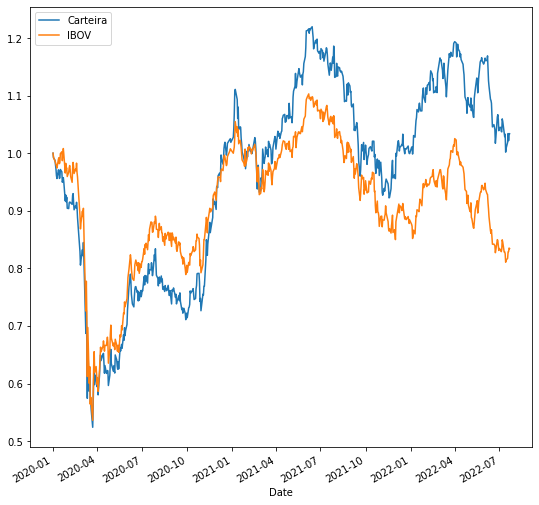

In [43]:
carteira_vs_ibov_normalizado.plot(figsize=(9,9));